In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble

import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib

# Define the path to the Excel file
file_path = r"C:\Users\prasa\OneDrive\Desktop\mysql-files\Customer_Data.csv"

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'
 
# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(data.head())



SyntaxError: invalid syntax (2663029794.py, line 10)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Corrected import statement for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the path to the Excel file
file_path = r"C:\Users\prasa\OneDrive\Desktop\mysql-files\Customer_Data.csv"

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'
 
# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(data.head())

ValueError: Excel file format cannot be determined, you must specify an engine manually.

# Assistant
The error occurs because there's an issue with how you're importing the RandomForestClassifier. The import statement is incorrectly structured.

Would you like me to provide the corrected code?

# Assistant
The error occurs because there's an issue with how you're importing the RandomForestClassifier. The import statement is incorrectly structured.

Would you like me to provide the corrected code?

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import joblib

# Define the path to the CSV file
file_path = r"C:\Users\prasa\OneDrive\Desktop\mysql-files\Customer_Data.csv"

# Read the CSV data into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                27        NaN           Yes             No  ...   
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card           65.6        593.30          0.00   
1      Credit Card          

In [8]:
print(data.columns)


Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')


In [12]:
data['Customer_Status'] = data['Customer_Status'].map({
    'Stayed': 0,
    'Churned': 1
})

# Drop rows where target is missing
data = data.dropna(subset=['Customer_Status'])


In [15]:
print(data['Customer_Status'].value_counts(dropna=False))


Series([], Name: count, dtype: int64)


In [17]:
print(data.shape)


(0, 29)


In [18]:
data = pd.read_csv(file_path)


In [19]:
print(data['Customer_Status'].value_counts(dropna=False))


Customer_Status
Stayed     4275
Churned    1732
Joined      411
Name: count, dtype: int64


In [22]:
print(data.shape)
print(data['Customer_Status'].value_counts())


(6418, 32)
Customer_Status
0    4686
1    1732
Name: count, dtype: int64


In [23]:
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [27]:
X.dtypes


Customer_ID                     object
Gender                          object
Age                              int64
Married                         object
State                           object
Number_of_Referrals              int64
Tenure_in_Months                 int64
Value_Deal                      object
Phone_Service                   object
Multiple_Lines                  object
Internet_Service                object
Internet_Type                   object
Online_Security                 object
Online_Backup                   object
Device_Protection_Plan          object
Premium_Support                 object
Streaming_TV                    object
Streaming_Movies                object
Streaming_Music                 object
Unlimited_Data                  object
Contract                        object
Paperless_Billing               object
Payment_Method                  object
Monthly_Charge                 float64
Total_Charges                  float64
Total_Refunds            

In [28]:
X.select_dtypes(include='object').head()


,Customer_ID,Gender,Married,State,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,...,Premium_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Churn_Category,Churn_Reason
0,19877-DEL,Male,No,Delhi,NaN,Yes,No,Yes,Cable,No,...,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,NaN,NaN
1,58353-MAH,Female,Yes,Maharashtra,NaN,Yes,Yes,Yes,Cable,No,...,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,NaN,NaN
2,25063-WES,Male,No,West Bengal,Deal 5,Yes,No,Yes,Fiber Optic,No,...,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Competitor,Competitor had better devices
3,59787-KAR,Male,No,Karnataka,Deal 4,Yes,No,Yes,Fiber Optic,No,...,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,No,Tamil Nadu,NaN,Yes,No,Yes,Fiber Optic,No,...,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,Dissatisfaction,Network reliability


In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in data.select_dtypes(include='object').columns:
    if col != 'Customer_Status':   # never encode target here
        le = LabelEncoder()
        data[col] = data[col].astype(str).fillna('Unknown')
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le


In [38]:
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']


In [39]:
print(X.select_dtypes(include='object').columns)


Index([], dtype='object')


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [41]:
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
y_pred = rf_model.predict(X_test)


In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[849  88]
 [146 201]]


In [44]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       937
           1       0.70      0.58      0.63       347

    accuracy                           0.82      1284
   macro avg       0.77      0.74      0.76      1284
weighted avg       0.81      0.82      0.81      1284



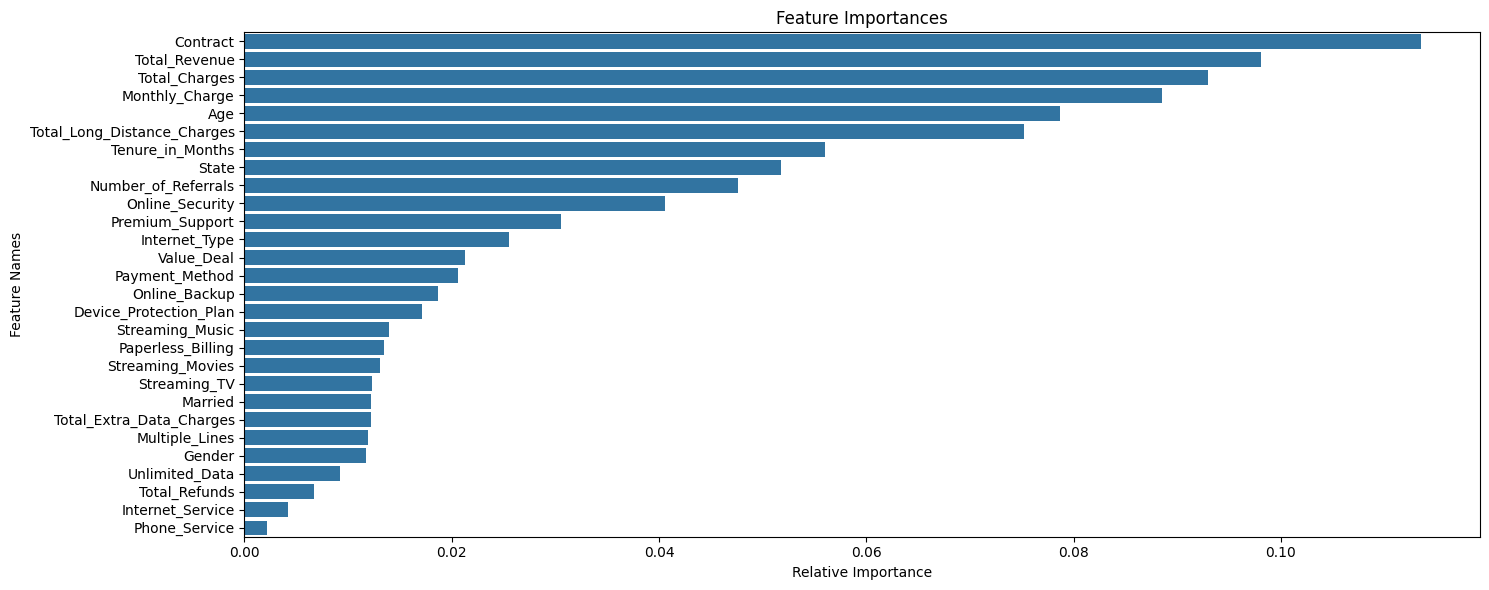

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame (BEST PRACTICE)
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False
)

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df
)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd
import numpy as np

# Correct file path (CSV)
file_path = r"C:\Users\prasa\OneDrive\Desktop\mysql-files\Customer_Data.csv"

# Read CSV (NOT Excel)
new_data = pd.read_csv(file_path)

# Preview
print(new_data.head())

# Keep original copy
original_data = new_data.copy()

# Keep Customer_ID
customer_ids = new_data['Customer_ID']

# Drop unused columns (use errors='ignore' to be safe)
new_data = new_data.drop(
    ['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
    axis=1,
    errors='ignore'
)

# Encode categorical columns safely
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        # Handle unseen labels
        new_data[column] = new_data[column].map(
            lambda x: x if x in label_encoders[column].classes_ else 'Unknown'
        )
        label_encoders[column].classes_ = np.append(
            label_encoders[column].classes_, 'Unknown'
        )
        new_data[column] = label_encoders[column].transform(new_data[column])

# Predict
new_predictions = rf_model.predict(new_data)

# Add predictions
original_data['Customer_Status_Predicted'] = new_predictions

# Filter churned customers
churned_customers = original_data[
    original_data['Customer_Status_Predicted'] == 1
]

# Save predictions to a NEW file (IMPORTANT)
output_path = r"C:\Users\prasa\OneDrive\Desktop\mysql-files\Churn_Predictions.csv"
churned_customers.to_csv(output_path, index=False)

print("Predictions saved successfully!")


  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                27        NaN           Yes             No  ...   
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card           65.6        593.30          0.00   
1      Credit Card          